<a href="https://colab.research.google.com/github/reyshamarie/Exploratory_Data_Analysis/blob/main/SalinasRM_StudentsPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis of Student's Performance**

The student performance dataset consists of 1000 rows and 11 columns, providing a comprehensive overview of various factors that may influence student performance. The dataset includes a mix of categorical and numerical variables, which can be used to explore relationships and trends between different factors.

Gender: A categorical variable representing the student's gender.

Race/Ethnicity: A categorical variable representing the student's racial or ethnic background.

Parental Level of Education: A categorical variable representing the highest level of education achieved by the student's parents.

Test Preparation Course: A categorical variable indicating whether the student participated in a test preparation course or not.

Math Score, Reading Score, and Writing Score: Numerical variables representing the student's scores in math, reading, and writing, respectively.

Average: A numerical variable representing the student's overall average score.

Grade: A categorical variable representing the student's grade level.

Passed/Failed: A categorical variable indicating whether the student passed or failed a particular test or course.

Output: A numerical variable representing the output or result of the student's performance.

# **Data Reading**

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import pandas as pd

studentperformance = pd.read_csv('/gdrive/My Drive/Colab Notebooks/activity4/StudentsPerformance.csv')

In [ ]:
#view dataset
head = studentperformance.head()
print(head)

   gender race/ethnicity parental level of education test preparation course  \
0  female        group B           bachelor's degree                    none   
1  female        group C                some college               completed   
2  female        group B             master's degree                    none   
3    male        group A          associate's degree                    none   
4    male        group C                some college                    none   

   math score  reading score  writing score  average Grade Passed / Failed  \
0          72             72             74    72.67     C          PASSED   
1          69             90             88    82.33     F          FAILED   
2          90             95             93    92.67     A          PASSED   
3          47             57             44    49.33     F          FAILED   
4          76             78             75    76.33     C          PASSED   

   Output  
0       1  
1       0  
2       1  
3 

In [ ]:
shape = studentperformance.shape
print(shape)

#1000 rows
#11 columns

(1000, 11)


In [ ]:
dtypes = studentperformance.dtypes
print(dtypes)

gender                          object
race/ethnicity                  object
parental level of education     object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
average                        float64
Grade                           object
Passed / Failed                 object
Output                           int64
dtype: object


In [ ]:
descrv= studentperformance.describe()
print(descrv)

       math score  reading score  writing score      average       Output
count  1000.00000    1000.000000    1000.000000  1000.000000  1000.000000
mean     66.08900      69.169000      68.054000    67.770580     0.409000
std      15.16308      14.600192      15.195657    14.257311     0.491895
min       0.00000      17.000000      10.000000     9.000000     0.000000
25%      57.00000      59.000000      57.750000    58.330000     0.000000
50%      66.00000      70.000000      69.000000    68.330000     0.000000
75%      77.00000      79.000000      79.000000    77.670000     1.000000
max     100.00000     100.000000     100.000000   100.000000     1.000000


# **Data Cleaning**

In [ ]:
#view uniqueness of categorical data
print(studentperformance['gender'].unique())
print(studentperformance['race/ethnicity'].unique())
print(studentperformance['parental level of education'].unique())
print(studentperformance['test preparation course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['none' 'completed']


In [ ]:
#check fo null
null = studentperformance.isnull().sum()
print(null)


gender                         0
race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average                        0
Grade                          0
Passed / Failed                0
Output                         0
dtype: int64


In [ ]:
import numpy as np

columns_to_replace = ['math score', 'reading score', 'writing score', 'average']
studentperformance[columns_to_replace] = studentperformance[columns_to_replace].replace(0, np.nan)

print(studentperformance.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     1
reading score                  0
writing score                  0
average                        0
Grade                          0
Passed / Failed                0
Output                         0
dtype: int64


In [ ]:
columns_to_replace = ['math score', 'reading score', 'writing score', 'average']
studentperformance[columns_to_replace] = studentperformance[columns_to_replace].fillna(0)

print(studentperformance.isnull().sum())


gender                         0
race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average                        0
Grade                          0
Passed / Failed                0
Output                         0
dtype: int64


In [ ]:
replace = studentperformance.fillna(0)
replace

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average,Grade,Passed / Failed,Output
0,female,group B,bachelor's degree,none,72.0,72,74,72.67,C,PASSED,1
1,female,group C,some college,completed,69.0,90,88,82.33,F,FAILED,0
2,female,group B,master's degree,none,90.0,95,93,92.67,A,PASSED,1
3,male,group A,associate's degree,none,47.0,57,44,49.33,F,FAILED,0
4,male,group C,some college,none,76.0,78,75,76.33,C,PASSED,1
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88.0,99,95,94.00,B,PASSED,1
996,male,group C,high school,none,62.0,55,55,57.33,F,FAILED,0
997,female,group C,high school,completed,59.0,71,65,65.00,F,FAILED,0
998,female,group D,some college,completed,68.0,78,77,74.33,F,FAILED,0


In [ ]:
#since there is no missing value we  can still use the variable studentperformance that holds the dataset

#check for duplicate values
duplicates = studentperformance.duplicated().sum()
duplicates

#there is 1 duplicated value

1

In [ ]:
#view duplicated value
duplicates = studentperformance[studentperformance.duplicated()]
duplicates

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average,Grade,Passed / Failed,Output
613,female,group C,associate's degree,none,65.0,77,74,72.0,F,FAILED,0


In [ ]:
#remove the duplicate

remove = studentperformance.drop_duplicates()
remove

#remove variable now holds the clean data

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average,Grade,Passed / Failed,Output
0,female,group B,bachelor's degree,none,72.0,72,74,72.67,C,PASSED,1
1,female,group C,some college,completed,69.0,90,88,82.33,F,FAILED,0
2,female,group B,master's degree,none,90.0,95,93,92.67,A,PASSED,1
3,male,group A,associate's degree,none,47.0,57,44,49.33,F,FAILED,0
4,male,group C,some college,none,76.0,78,75,76.33,C,PASSED,1
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88.0,99,95,94.00,B,PASSED,1
996,male,group C,high school,none,62.0,55,55,57.33,F,FAILED,0
997,female,group C,high school,completed,59.0,71,65,65.00,F,FAILED,0
998,female,group D,some college,completed,68.0,78,77,74.33,F,FAILED,0


In [ ]:
duplicates = remove.duplicated().sum()
duplicates

#duplicate is now dropped

0

# **Analysis and Data Visualization**

In [ ]:
df_analysis = remove.copy()
df_analysis.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average,Grade,Passed / Failed,Output
0,female,group B,bachelor's degree,none,72.0,72,74,72.67,C,PASSED,1
1,female,group C,some college,completed,69.0,90,88,82.33,F,FAILED,0
2,female,group B,master's degree,none,90.0,95,93,92.67,A,PASSED,1
3,male,group A,associate's degree,none,47.0,57,44,49.33,F,FAILED,0
4,male,group C,some college,none,76.0,78,75,76.33,C,PASSED,1


# **Hypothesis 1:** There is a perfect positive correlation between the sum of math, reading, and writing scores and the average score.

In [ ]:
import pandas as pd
import numpy as np

# sum of math, reading, and writing scores
df_analysis['sum_scores'] = df_analysis['math score'] + df_analysis['reading score'] + df_analysis['writing score']

#correlation coefficient between the sum of scores and the average score
corr_coef = np.corrcoef(df_analysis['sum_scores'], df_analysis['average'])

print(f"Correlation coefficient: {corr_coef[0, 1]}")


Correlation coefficient: 0.9999999819611293


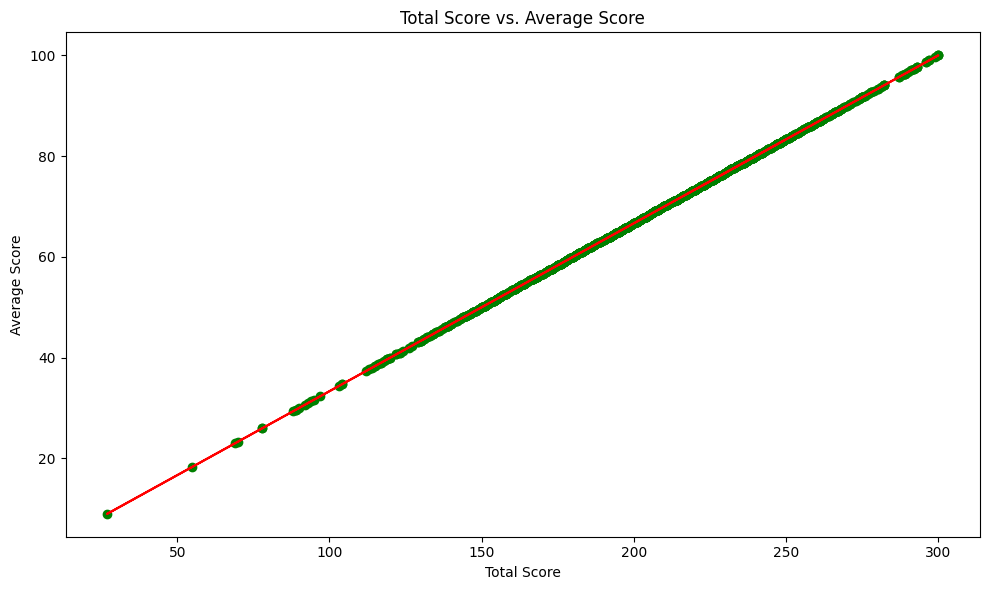

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_analysis['sum_scores'] = df_analysis['math score'] + df_analysis['reading score'] + df_analysis['writing score']

m, b = np.polyfit(df_analysis['sum_scores'], df_analysis['average'], 1)

plt.figure(figsize=(10, 6))
plt.scatter(df_analysis['sum_scores'], df_analysis['average'], color='green') # Added color
plt.plot(df_analysis['sum_scores'], m * df_analysis['sum_scores'] + b, color='red')
plt.title('Total Score vs. Average Score')
plt.xlabel('Total Score')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

**Conclusion**: As the sum of individual subject scores increases, the average score increases at the same rate, confirming the hypothesis.

The analysis strongly supports the hypothesis that there's a perfect positive correlation between the sum of math, reading, and writing scores and the average score. The calculated correlation coefficient and the visualization clearly demonstrate that these two variables have a direct and proportional relationship.

# **Hypothesis 2:** Students whose parents have a higher level of education will have higher average score.

In [ ]:
parental_ed_avg_scores = df_analysis.groupby('parental level of education')[['average']].mean()
print(parental_ed_avg_scores)

                               average
parental level of education           
associate's degree           69.557964
bachelor's degree            71.923983
high school                  63.097194
master's degree              73.598644
some college                 68.476106
some high school             65.107654


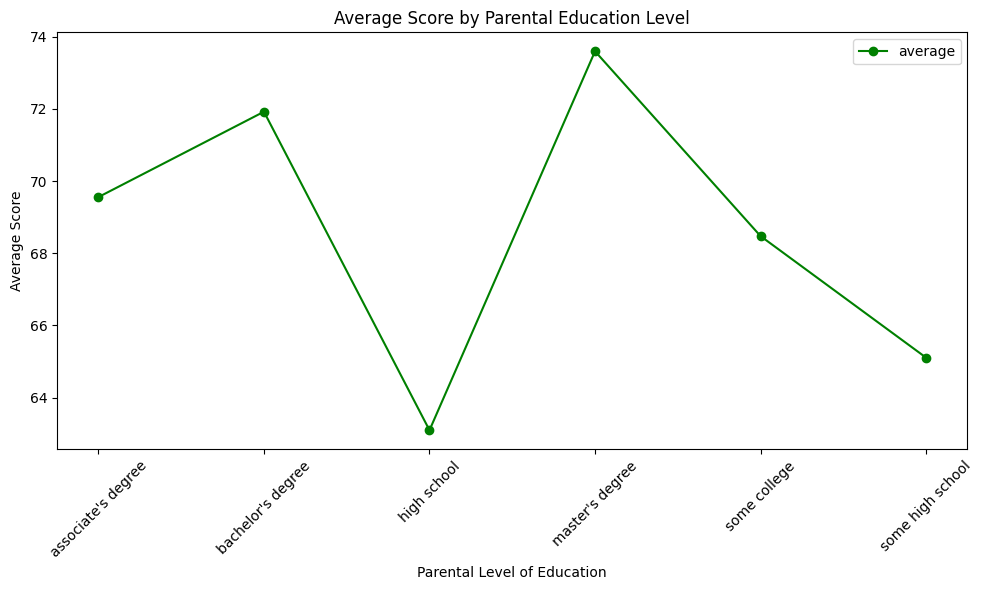

In [ ]:
!pip install matplotlib==3.7.1
import matplotlib.pyplot as plt

parental_ed_avg_scores.plot(kind='line', figsize=(10, 6), color = "green", marker='o')
plt.title('Average Score by Parental Education Level')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusion:** The analysis indicates a positive correlation between parental education level and students' average scores. Students whose parents have higher levels of education tend to have higher average scores.


While the 'some college' and 'some high school' categories could be analyzed separately for a more detailed comparison, the current analysis still supports the hypothesis that a higher level of parental education generally corresponds to higher average scores for students.

# **Hypothesis 3:** Students who participated in a test preparation course will have higher average scores compared to those who did not.

In [ ]:
test_prep = df_analysis.groupby('test preparation course')['average'].mean()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


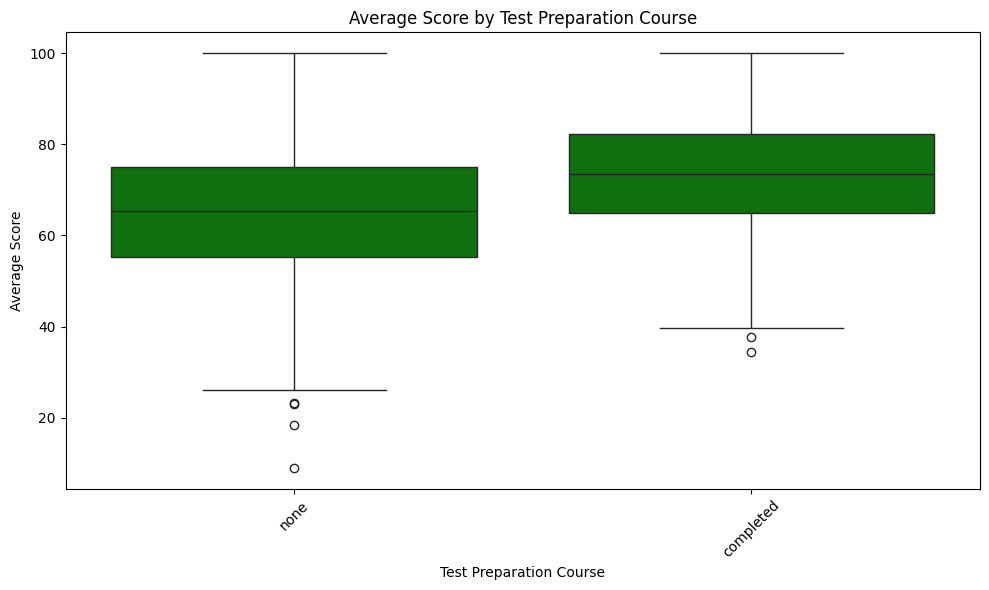

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='average', data=df_analysis, color='green')
plt.title('Average Score by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusison :** The box plot strongly provides evidence of a positive correlation between test preparation courses and students' average scores. Those who completed the test preparation course have a higher median score than those who did not.

Thus analysis and visualization support the hypothesis.


# **Hypothesis 4:** There's a difference in average scores between different race/ethnicity groups across different subjects (math, reading, writing)

In [ ]:
avg_scores = df_analysis.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

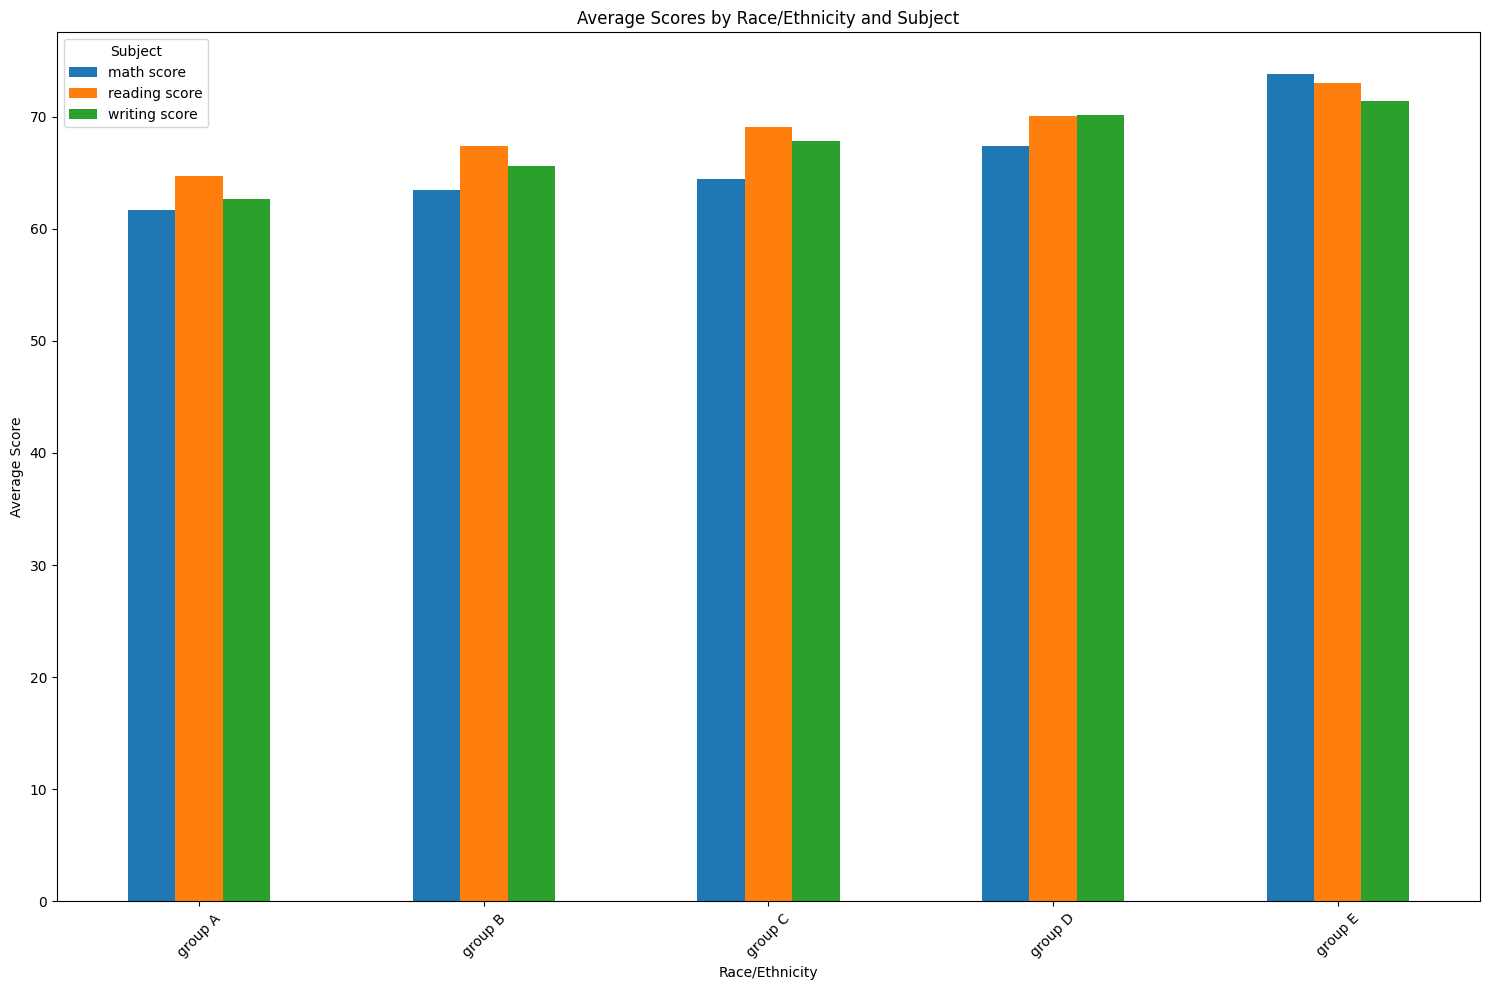

In [ ]:
avg_scores.plot(kind='bar', figsize=(15, 10))
plt.title('Average Scores by Race/Ethnicity and Subject')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Subject')
plt.tight_layout()
plt.show()



**Conclusion:**

The analysis of average scores in math, reading, and writing shows differences in academic performance among various race and ethnicity groups, supporting the hypothesis. The visual data illustrates these score variations, indicating that race and ethnicity may impact achievement in these subjects.

# **Hypothesis 5:** Student's between male and female will have different average of score thus one gender may perform better.

In [ ]:
gender_avg_score = df_analysis.groupby('gender')['average'].mean()

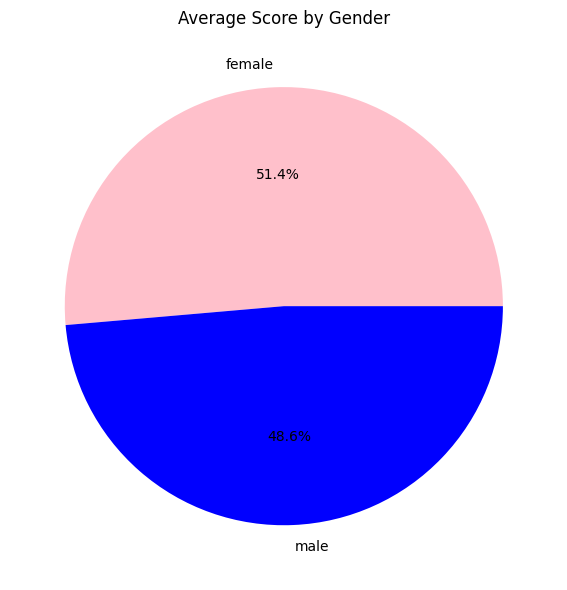

In [ ]:
gender_avg_score.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Average Score by Gender')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

male_scores = df_analysis[df_analysis['gender'] == 'male']['average']
female_scores = df_analysis[df_analysis['gender'] == 'female']['average']

t_stat, p_value = stats.ttest_ind(male_scores, female_scores)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

#t-test to  see if the average score between is statistically significant.

T-statistic: -4.16
P-value: 0.000


**Conclusion:** The analysis supports the hypothesis that one gender may perform better than the other, with females demonstrating a higher average score in this dataset.